In [47]:
#importing libraries

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
#importing data.csv file

In [50]:
dataset = pd.read_csv("data.csv")

In [51]:
#checking data

In [52]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [53]:
#all columns are relevant no need to drop

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 784.8+ KB


In [55]:
#setting values for graph

In [56]:
yes = dataset[dataset.deposit == "yes"]

In [57]:
no = dataset[dataset.deposit == "no"]

In [58]:
#plotting graph

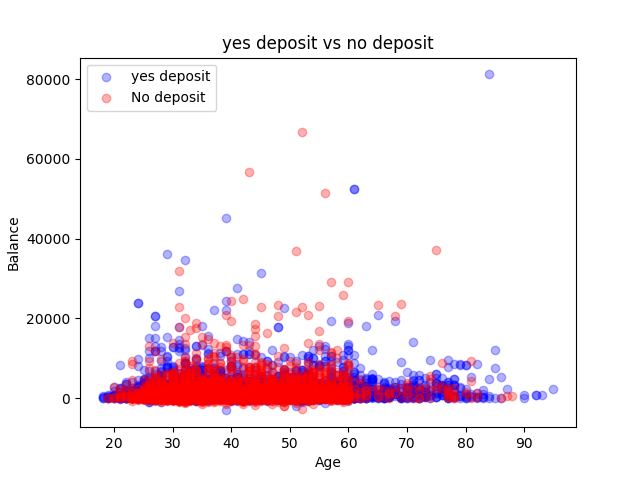

In [59]:
plt.title("yes deposit vs no deposit")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.scatter(yes.age, yes.balance, color = "blue", label = "yes deposit", alpha = 0.3)
plt.scatter(no.age, no.balance, color = "red", label = "No deposit", alpha = 0.3)
plt.legend()
plt.show()

In [60]:
#this is a graph which shows the yes deposit or no deposit with age and balance as parameter
# we get to know that older people have more balance as well as deposits 

In [61]:
#Encoding data 

In [62]:
dataset['deposit'] = dataset['deposit'].apply(
    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
#dataset['deposit'] = le.fit_transform(dataset['deposit'])
dataset['job'] = le.fit_transform(dataset['job'])
dataset['education'] = le.fit_transform(dataset['education'])
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['contact'] = le.fit_transform(dataset['contact'])
dataset['month'] = le.fit_transform(dataset['month'])
dataset['poutcome'] = le.fit_transform(dataset['poutcome'])
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['marital'] = le.fit_transform(dataset['marital'])
dataset['default'] = le.fit_transform(dataset['default'])

In [63]:
x = dataset.drop(["deposit"], axis = 1)
y = dataset.deposit.values

In [64]:
# splitting data into test and train

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [66]:
# using gaussian naive bayes algo

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [68]:
#printing naive bayes score

In [69]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.7420382165605095


In [70]:
#precision score,recall score,f1 scores

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred=nb.predict(x_test)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.706
Recall: 0.776
F1 Score: 0.739


In [72]:
#prediction array

In [73]:
nb.predict(x_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [74]:
#importing test data

In [75]:
dataset_test = pd.read_csv("test_data.csv")

In [76]:
#encoding test data

In [77]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset_test['job'] = le.fit_transform(dataset_test['job'])
dataset_test['education'] = le.fit_transform(dataset_test['education'])
dataset_test['loan'] = le.fit_transform(dataset_test['loan'])
dataset_test['contact'] = le.fit_transform(dataset_test['contact'])
dataset_test['month'] = le.fit_transform(dataset_test['month'])
dataset_test['poutcome'] = le.fit_transform(dataset_test['poutcome'])
dataset_test['housing'] = le.fit_transform(dataset_test['housing'])
dataset_test['marital'] = le.fit_transform(dataset_test['marital'])
dataset_test['default'] = le.fit_transform(dataset_test['default'])

In [78]:
x_final_test=dataset_test

In [79]:
pred=nb.predict(x_final_test)

In [80]:
pred = pd.DataFrame(pred, columns=['deposit']).to_csv('result_data.csv')

In [82]:
final_result= pd.read_csv("result_data.csv")

In [83]:
final_result.head()

,Unnamed: 0,deposit
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [84]:
final_result['deposit'] = final_result['deposit'].apply(
    lambda x: 'yes' if x == 1 else ('no' if x == 0 else None))

In [85]:
final_result.head()

,Unnamed: 0,deposit
0,0,no
1,1,no
2,2,no
3,3,no
4,4,no


In [86]:
final_result = pd.DataFrame(final_result, columns=['deposit']).to_csv('result_data.csv')